# Numerical integration


In the next part, we will try to write the composite trapezoidal formula recursively, so that we have as little  calucations as possible when increasing the number of points!

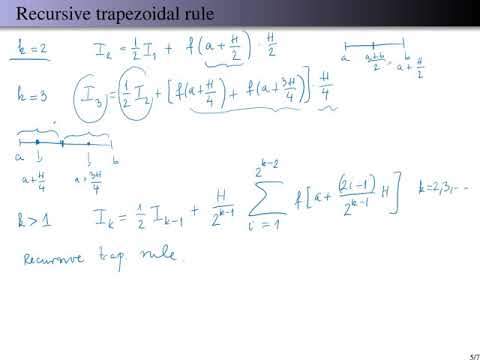

In [3]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("ZS9aTy-_rEM")
display(vid)

The following is a comparison of composite trapezoidal rule with the value we get using the built-in function from the scipy library

In [4]:
def trapez(f,a,b,N=16):
    x = np.linspace(a,b,N+1) 
    #print(x)
    y = f(x)
    y_right = y[1:] # lijevi rub intervala
    y_left = y[:-1] # desni rub intervala
    h = (b - a)/N
    Tn = np.sum(h*(y_right + y_left)/2)
    return Tn

import numpy as np
from numpy import exp
from numpy import cos
from numpy import pi
from numpy import sin

#trapez(lambda x : x*exp(-x)*cos(2*x),0,2*pi,5)

approx1=trapez(lambda x : sin(x),0, pi,8)
print("Aproksimacija-implementacija=", approx1)

Aproksimacija-implementacija= 1.9742316019455508


In [5]:
from scipy import integrate
x = np.linspace(0,pi,9)
y=sin(x)
print("Value  from scipy(trapezoid):", integrate.trapz(y, x))

Value  from scipy(trapezoid): 1.9742316019455508


In the following code, a recursive trapezoidal rule is implemented and we solve an example that was solved in video lectures

In [6]:
#funkcija koja računa vrojednost integrala I_k sa brojem intervala 2^{k-1} iz vrijednosti integrala I_{k-1}


def trap_rec(f,a,b, I0, k):
    if k==1:
        I1=(f(a)+f(b))*(b-a)/2.0
    else:
        n=2**(k-2)
        h=(b-a)/n
        x=a+h/2.0
        new_points_sum=0.0
        for j in range(n):
            new_points_sum=new_points_sum+f(x)
            x=x+h
        I1=(I0+h*new_points_sum)/2.0
    return I1
# Primjer s video predavanja

approx2=trap_rec(lambda x : sin(x),0, pi,approx1,5)
print("Aproksimacija za k=5:", approx2)

approx3=trap_rec(lambda x : sin(x),0, pi,approx2,6)
print("Aproksimacija za k=6:", approx3)    

approx4=trap_rec(lambda x : sin(x),0, pi,approx3,7)
print("Aproksimacija za k=7:", approx4)    
    

Aproksimacija za k=5: 1.9935703437723393
Aproksimacija za k=6: 1.998393360970144
Aproksimacija za k=7: 1.9995983886400366


Homework.  Implement a function that calculates with a recursive trapezoidal rule the value of the integral up to a given accuracy (this implies that $ | I_k-I_{k-1} | <\varepsilon $ where $ \varepsilon $ is a predetermined accuracy. If it cannot be achieved stated, print a message that the procedure cannot give such accuracy)

 # Richardson extrapolation
 Richardson extrapolation is a general procedure for improving the accuracy of approximation formulas. The following video will explain the general procedure and application to numerical derivation​. The following video is in croation. The Richardson extrapolation does not enter midterm exam, but it enters third online quiz. Please read about this topic from the book.

In [26]:
vid = YouTubeVideo("y2GeEeY54EY")
display(vid)

# Romberg integration

We will now apply Richardson’s extrapolation to improve the accuracy of the composite trapezoidal rule. We call such a procedure the Romberg algorithm. This is also not entering midterm. Read about this topic from the book!

In [27]:
vid = YouTubeVideo("r0B5vZopCKw")
display(vid)

In [7]:
from scipy import integrate

result = integrate.romberg(sin, 0, pi, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x0000021EDF461A60> from [0, 3.141592653589793]

 Steps  StepSize   Results
     1  3.141593  0.000000 
     2  1.570796  1.570796  2.094395 
     4  0.785398  1.896119  2.004560  1.998571 
     8  0.392699  1.974232  2.000269  1.999983  2.000006 
    16  0.196350  1.993570  2.000017  2.000000  2.000000  2.000000 
    32  0.098175  1.998393  2.000001  2.000000  2.000000  2.000000  2.000000 

The final result is 2.000000000001321 after 33 function evaluations.
